In [1]:
import pandas as pd

so_survey_csv="https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv"


# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

so_survey_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [2]:
so_survey_df.dtypes

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object

# Selecting specific data types

In [3]:
Numberic_df=so_survey_df.select_dtypes(include=["int64","float64"])
Numberic_df

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
0,NaN,NaN,21,13
1,70841.0,7.0,38,9
2,NaN,8.0,45,11
3,21426.0,NaN,46,12
4,41671.0,8.0,39,7
...,...,...,...,...
994,NaN,NaN,45,10
995,58746.0,8.0,27,16
996,55000.0,NaN,54,16
997,NaN,NaN,23,9


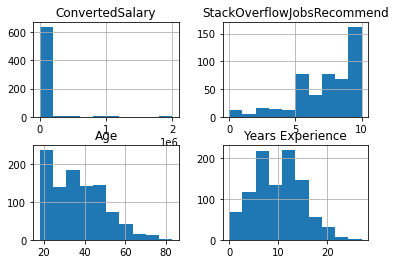

In [4]:
import matplotlib.pyplot as plt
Numberic_df.hist()
plt.show()

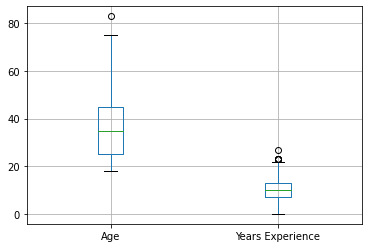

In [5]:
Numberic_df[["Age","Years Experience"]].boxplot()
plt.show()

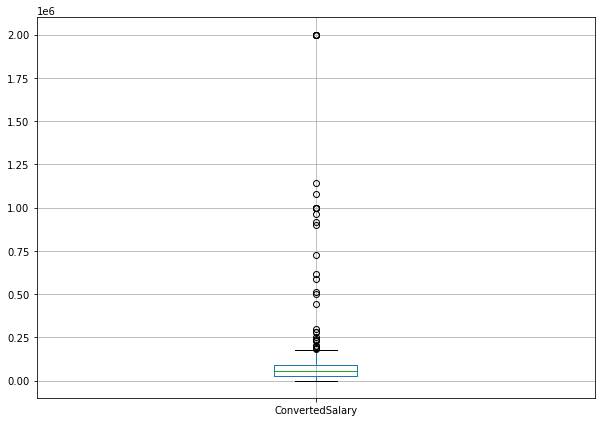

In [6]:
plt.figure(figsize=(10,7))
Numberic_df[["ConvertedSalary"]].boxplot()
plt.show()

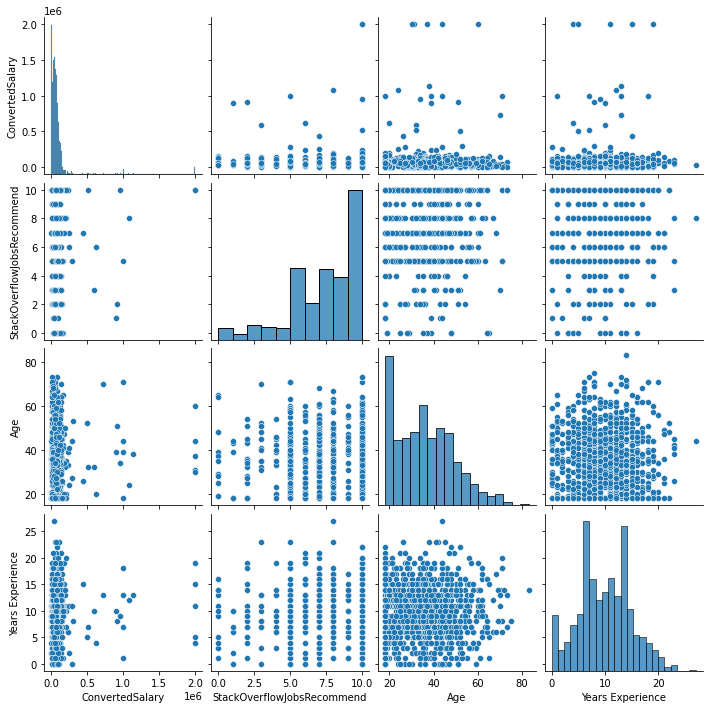

In [7]:
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(Numberic_df)
plt.show()

In [8]:
Numberic_df.describe()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
count,6.650000e+02,487.000000,999.000000,999.000000
mean,9.256517e+04,7.061602,36.003003,9.961962
std,2.091344e+05,2.621591,13.255127,4.878129
min,0.000000e+00,0.000000,18.000000,0.000000
25%,2.755000e+04,5.000000,25.000000,7.000000
50%,5.556200e+04,7.000000,35.000000,10.000000
75%,8.823800e+04,10.000000,45.000000,13.000000
max,2.000000e+06,10.000000,83.000000,27.000000


# Preprocessing all The Numberic Data

## Normalization 

In [9]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler=MinMaxScaler()
mm_scaler.fit(Numberic_df[["Age"]])

MinMaxScaler()

In [10]:
Numberic_df['Age_MM']=mm_scaler.transform(Numberic_df[['Age']])

<ipython-input-10-f7c6c89cf4a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Numberic_df['Age_MM']=mm_scaler.transform(Numberic_df[['Age']])


In [11]:
Numberic_df[['Age_MM', 'Age']]

,Age_MM,Age
0,0.046154,21
1,0.307692,38
2,0.415385,45
3,0.430769,46
4,0.323077,39
...,...,...
994,0.415385,45
995,0.138462,27
996,0.553846,54
997,0.076923,23


array([[<AxesSubplot:title={'center':'Age_MM'}>]], dtype=object)

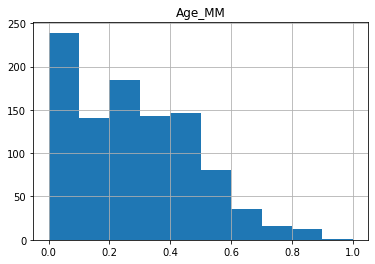

In [12]:
#Useing MinMax Scaler we converted the age column in range of 0-1 please Go through the next slide

Numberic_df[['Age_MM']].hist()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

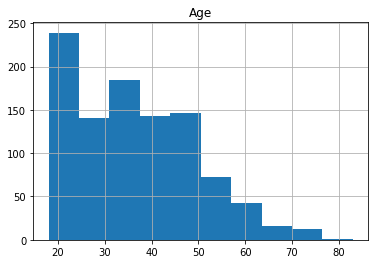

In [13]:
# Before applying MinMax scaler
Numberic_df[['Age']].hist()

## Standardization

In [14]:
from sklearn.preprocessing import StandardScaler  

SS_scaler=StandardScaler()
SS_scaler.fit(Numberic_df[['Age']])

Numberic_df['Age_SS'] = SS_scaler.transform(Numberic_df[['Age']])

Numberic_df[['Age_SS', 'Age']].head()

<ipython-input-14-cab7cf6b31af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Numberic_df['Age_SS'] = SS_scaler.transform(Numberic_df[['Age']])


,Age_SS,Age
0,-1.132431,21
1,0.150734,38
2,0.679096,45
3,0.754576,46
4,0.226214,39


<Figure size 720x504 with 0 Axes>

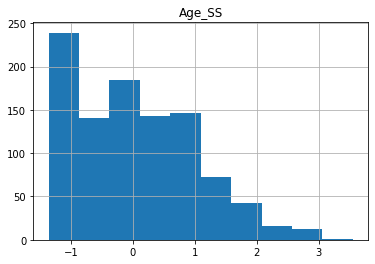

In [15]:
plt.figure(figsize=(10,7))
Numberic_df[['Age_SS']].hist()
plt.show()

## PowerTransformer

In [16]:
from sklearn.preprocessing import PowerTransformer

PowerT=PowerTransformer()
PowerT.fit(Numberic_df[['ConvertedSalary']])
Numberic_df['ConvertedSalary_pt'] =PowerT.transform(Numberic_df[['ConvertedSalary']])

Numberic_df[['ConvertedSalary_pt', 'ConvertedSalary']].head()

<ipython-input-16-85693872fda9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Numberic_df['ConvertedSalary_pt'] =PowerT.transform(Numberic_df[['ConvertedSalary']])


,ConvertedSalary_pt,ConvertedSalary
0,NaN,NaN
1,0.312939,70841.0
2,NaN,NaN
3,-0.652182,21426.0
4,-0.135589,41671.0


array([[<AxesSubplot:title={'center':'ConvertedSalary_pt'}>]],
      dtype=object)

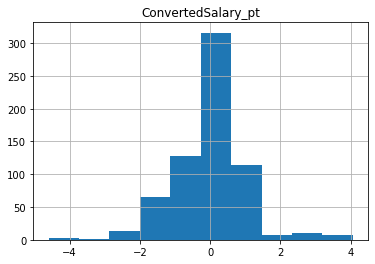

In [17]:
# After PowerTransformer
    
Numberic_df[['ConvertedSalary_pt']].hist()

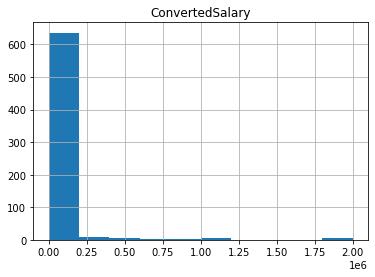

In [18]:
# Before PowerTransformer
Numberic_df[['ConvertedSalary']].hist()
plt.show()

# Percentage based outlier removal

In [19]:
# Find the 95th quantile
quantile = Numberic_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = Numberic_df[Numberic_df['ConvertedSalary'] < quantile]


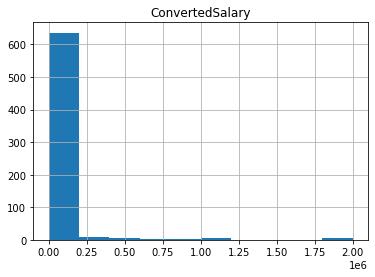

<Figure size 432x288 with 0 Axes>

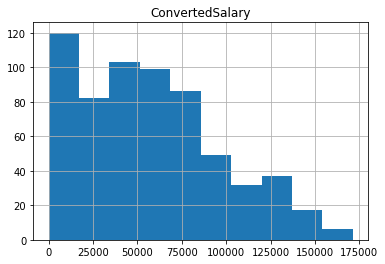

In [20]:
Numberic_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

trimmed_df[['ConvertedSalary']].hist()
plt.show()

# Statistical Outlier Removal

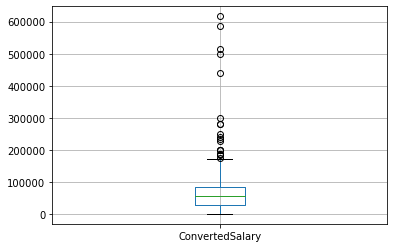

In [26]:
std = Numberic_df['ConvertedSalary'].std()
mean = Numberic_df['ConvertedSalary'].mean()

cutoff=std*3
lower,upper=mean-cutoff,mean+cutoff

trimmed_df = Numberic_df[(Numberic_df['ConvertedSalary'] < upper)  
                           & (Numberic_df['ConvertedSalary'] > lower)]

trimmed_df[['ConvertedSalary']].boxplot()
plt.show()